# Zadanie 1 - Preprocessing danych
## Jan Banot
Wybrany zbiór danych: https://archive.ics.uci.edu/dataset/571/hcv+data

1. Wczytanie danych i usunięcie zbędnej kolumny
    Dane zostały wczytane z pliku CSV. Następnie usunięto kolumnę "Unnamed: 0", która nie była potrzebna do analizy. Utworzono również kopię oryginalnego DataFrame (df_original).

2. Obsługa brakujących wartości
    Sprawdzono, w których kolumnach występują brakujące wartości. Dla kolumn numerycznych (takich jak ALB, ALP, ALT, CHOL, PROT) brakujące wartości (NaN) zostały zastąpione średnią wartością z danej kolumny. Przeprowadzono weryfikację, aby upewnić się, że wszystkie brakujące wartości zostały uzupełnione.

3. Sprawdzenie duplikatów
    Sprawdzono, czy w zbiorze danych istnieją zduplikowane wiersze. W tym przypadku nie znaleziono duplikatów. Kod zawierał opcjonalny krok usunięcia duplikatów, gdyby zostały znalezione.

4. Wykrywanie i obsługa wartości odstających
    W kolumnach numerycznych (z wyłączeniem 'Age') zidentyfikowano wartości odstające za pomocą metody IQR (rozstęp międzykwartylowy). Wartości poniżej Q1 - 1.5 * IQR oraz powyżej Q3 + 1.5 * IQR uznano za outliery. Wykryte wartości odstające zostały zastąpione wartościami granicznymi (dolną lub górną granicą wyznaczoną przez IQR), aby zmniejszyć ich wpływ na model.

5. Normalizacja danych
    Kolumny numeryczne (z wyłączeniem 'Age') zostały znormalizowane za pomocą skalowania Min-Max (MinMaxScaler). Ta technika przeskalowuje wartości do zakresu [0, 1].

6. Dyskretyzacja danych
    Kolumna 'Age' została poddana dyskretyzacji za pomocą KBinsDiscretizer. Wartości wieku zostały podzielone na 10 przedziałów (binów) o równej szerokości ('uniform'), a następnie zakodowane jako liczby porządkowe (0-9). Utworzono nową kolumnę 'Age_Category'.

7. Kodowanie zmiennych kategorycznych
    Zmienna kategoryczna 'Category' została zakodowana za pomocą techniki one-hot encoding (przy użyciu pd.get_dummies). Usunięto pierwszą kategorię (drop_first=True), aby uniknąć współliniowości. W wyniku tego powstały nowe binarne kolumny reprezentujące poszczególne kategorie (np. 'Category_0s=suspect Blood Donor', 'Category_1=Hepatitis' itd.).

8. Podział zbioru danych
    Przygotowany zbiór danych został podzielony na zbiór treningowy i testowy. Kolumny wynikowe z kodowania one-hot zostały zdefiniowane jako zmienne docelowe (y), a pozostałe kolumny jako cechy (X). Podziału dokonano w stosunku 60% danych treningowych i 40% danych testowych (test_size=0.4), z ustalonym random_state dla powtarzalności wyników.

9. Wizualizacja danych
    Przeprowadzono wizualizację danych przed i po preprocessingu, aby zilustrować wpływ wykonanych kroków na dane.

In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Krok 1 - wczytanie danych z pliku CSV oraz usunięcie niepotrzebnej kolumny "Unnamed: 0"
df = pd.read_csv("/Users/janbanot/Dev/studia/msc-cs-code/sem2/ADWB/data/hcvdat0.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df_original = df.copy()


In [157]:
# Krok 2 - Obsługa brakujących wartości. Dla kolumn numerycznych, brakujące wartości zastępujemy średnią wartościa z tej kolumny
missing_values = df.isnull().sum()
print(f"Brakujące wartości: \n{missing_values}")

numeric_cols = df.select_dtypes(include=["number"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
# Weryfikacja, czy brakujące wartości zostały usunięte
missing_values = df.isnull().sum()
print(f"Brakujące wartości: \n{missing_values}")

Brakujące wartości: 
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64
Brakujące wartości: 
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [158]:
# Krok 3 - Sprawdzenie duplikatów
duplicates = df.duplicated().sum()
print(f"Liczba duplikatów: {duplicates}")

# Opcjonalnie: usunięcie duplikatów
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplikaty zostały usunięte.")

Liczba duplikatów: 0


In [159]:
# Krok 4 - Wykrywanie outlierów w kolumnach numerycznych
numeric_cols = df.select_dtypes(include=["number"]).columns
numeric_cols = numeric_cols.drop("Age")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # Pierwszy kwartyl
    Q3 = df[col].quantile(0.75)  # Trzeci kwartyl
    IQR = Q3 - Q1  # Rozstęp międzykwartylowy

    # Obliczanie granic dla outlierów
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Wykrywanie outlierów
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Kolumna: {col}")
    print(f"Liczba outlierów: {len(outliers)}")
    print("-" * 40)

    # Zastępowanie outlierów wartościami granicznymi
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


Kolumna: ALB
Liczba outlierów: 27
----------------------------------------
Kolumna: ALP
Liczba outlierów: 14
----------------------------------------
Kolumna: ALT
Liczba outlierów: 36
----------------------------------------
Kolumna: AST
Liczba outlierów: 64
----------------------------------------
Kolumna: BIL
Liczba outlierów: 47
----------------------------------------
Kolumna: CHE
Liczba outlierów: 24
----------------------------------------
Kolumna: CHOL
Liczba outlierów: 12
----------------------------------------
Kolumna: CREA
Liczba outlierów: 12
----------------------------------------
Kolumna: GGT
Liczba outlierów: 65
----------------------------------------
Kolumna: PROT
Liczba outlierów: 20
----------------------------------------


In [160]:
# Krok 5 - Normalizacja danych
# Zastosowanie Min-Max Scaling do kolumn numerycznych
numeric_cols = df.select_dtypes(include=["number"]).columns
# Wykluczamy kolumnę "Age" z normalizacji
numeric_cols = numeric_cols.drop("Age")

# Zastosowanie Min-Max Scaling do kolumn numerycznych
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [161]:
# Krok 6 - Dyskretyzacja danych za pomocą KBinsDiscretizer

#
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df['Age_Category'] = kbins.fit_transform(df[['Age']]).astype(int)  # Dyskretyzacja kolumny "Age"

/Users/janbanot/.pyenv/versions/3.11.7/envs/jupyter/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [162]:
# Krok 7 - Kodowanie zmiennych kategorycznych za pomocą one-hot encoding
# Wybór kolumn kategorycznych
categorical_cols = ['Category']

# Kodowanie zmiennych kategorycznych
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [163]:
# Krok 8 - Podział zbioru danych na zbiór treningowy i testowy

# Usunięcie kolumn kategorycznych, które nie są potrzebne
target_cols = ['Category_0s=suspect Blood Donor', 'Category_1=Hepatitis', 'Category_2=Fibrosis', 'Category_3=Cirrhosis']
df_train = df.copy()
df_train.head()

X = df_train.drop(columns=target_cols)  # Kolumny cech
X = X.drop(columns=["Age_Category"])
y = df_train[target_cols]  # Kolumny docelowe

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Weryfikacja rozmiarów zbiorów
print(f"Rozmiar zbioru treningowego: {X_train.shape}, {y_train.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}, {y_test.shape}")

Rozmiar zbioru treningowego: (369, 12), (369, 4)
Rozmiar zbioru testowego: (246, 12), (246, 4)


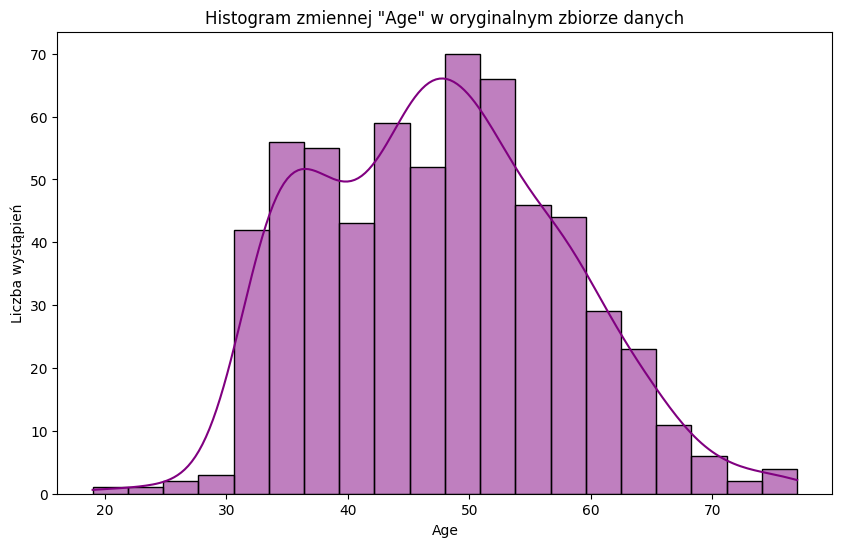

/var/folders/qp/6rw2gv993fl39__9ln9q18k00000gn/T/ipykernel_20919/2552503053.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


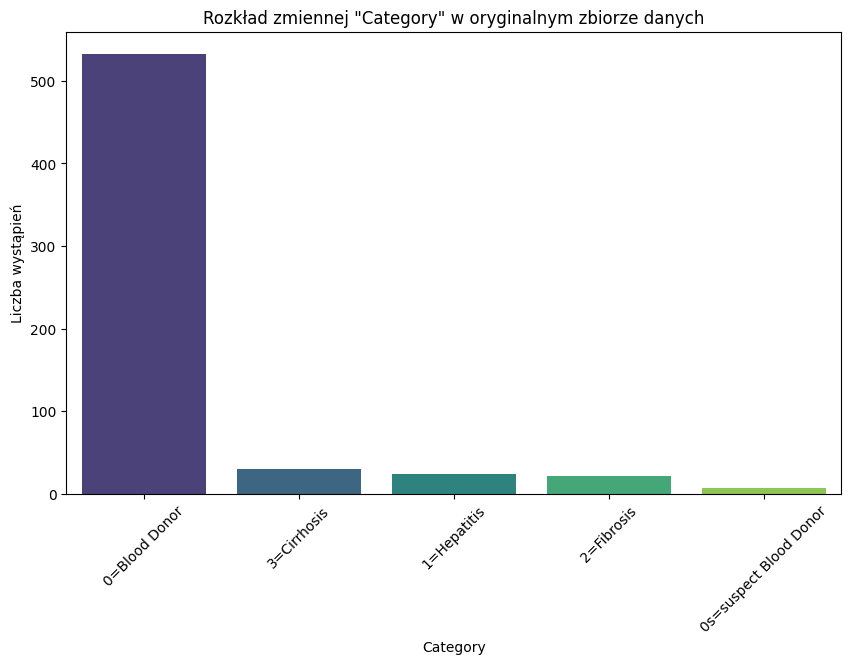

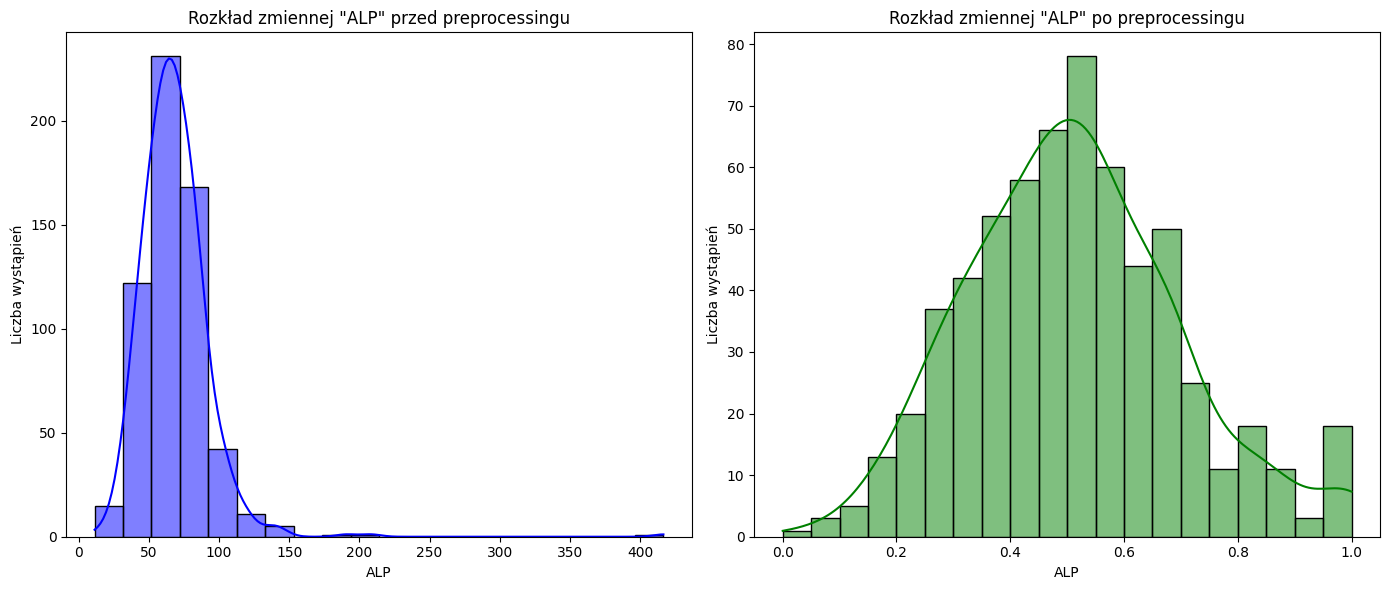

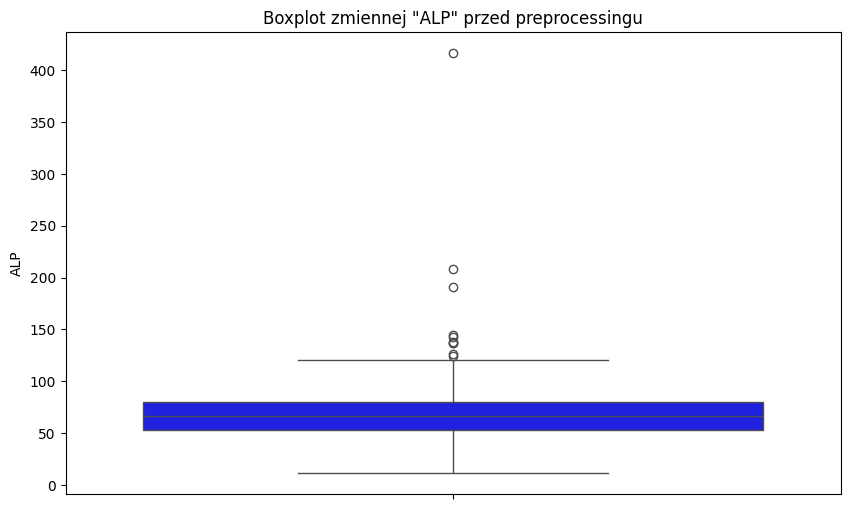

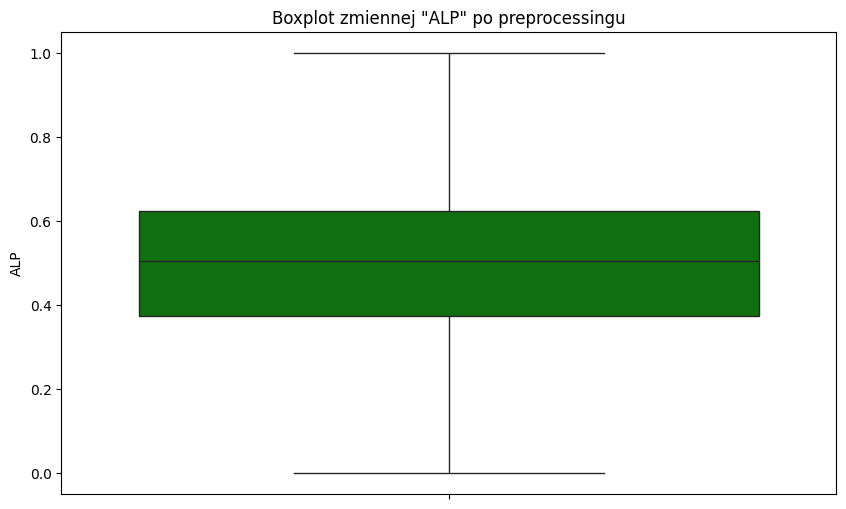

In [164]:
# Krok 9 - Wizualizacja danych

# Histogram dla zmiennej "Age" w df_original
plt.figure(figsize=(10, 6))
sns.histplot(df_original['Age'], kde=True, bins=20, color='purple')
plt.title('Histogram zmiennej "Age" w oryginalnym zbiorze danych')
plt.xlabel('Age')
plt.ylabel('Liczba wystąpień')
plt.show()

# Wykres słupkowy dla zmiennej "Category" w df_original
plt.figure(figsize=(10, 6))
category_counts = df_original['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Rozkład zmiennej "Category" w oryginalnym zbiorze danych')
plt.xlabel('Category')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.show()

# Analiza rozkładu zmiennej "ALP" przed i po preprocessingu
plt.figure(figsize=(14, 6))

# Histogram dla df_original (przed preprocessingu)
plt.subplot(1, 2, 1)
sns.histplot(df_original['ALP'], kde=True, bins=20, color='blue')
plt.title('Rozkład zmiennej "ALP" przed preprocessingu')
plt.xlabel('ALP')
plt.ylabel('Liczba wystąpień')

# Histogram dla df (po preprocessingu)
plt.subplot(1, 2, 2)
sns.histplot(df['ALP'], kde=True, bins=20, color='green')
plt.title('Rozkład zmiennej "ALP" po preprocessingu')
plt.xlabel('ALP')
plt.ylabel('Liczba wystąpień')

plt.tight_layout()
plt.show()

# Boxplot dla df_original (przed preprocessingu)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_original['ALP'], color='blue')
plt.title('Boxplot zmiennej "ALP" przed preprocessingu')
plt.ylabel('ALP')
plt.show()

# Boxplot dla df (po preprocessingu)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['ALP'], color='green')
plt.title('Boxplot zmiennej "ALP" po preprocessingu')
plt.ylabel('ALP')
plt.show()